# <font style="color:rgb(50,120,229)">Image Annotation</font>

In the previous modules we have discussed about basic image operations. Before going into advanced topics, let us learn about a simple but important tool in OpenCV - **Image Annotation**. In this module, we will learn how to annotate an image with 
* __Line__, 
* __Circle__, 
* __Rectangle__,
* __Ellipse__ and 
* __Text__

These are very useful for showing the output of an algorithm. For example after detecting a face, you need to show the detection result using a rectangle or circle. Similarly, after recognizing an object, you need to show what object it is by writing on top of the object in the image itself and so on..

# <font style="color:rgb(50,120,229)">Read a sample image</font>
    
Let us read a sample image and use it as reference for discussing the different types of annotation. 

In [16]:
# Import cv2 module
import cv2
import os
DATA_PATH = '.'
import numpy as np

In [8]:
# Import matplotlib for displaying image
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [10]:
# Path to the image we are going to read
# This can be an absolute or relative path
# Here we are using a relative path
imageName = os.path.join(DATA_PATH, "data/images/boy.jpg")

# Load the image
image = cv2.imread(imageName, cv2.IMREAD_COLOR)

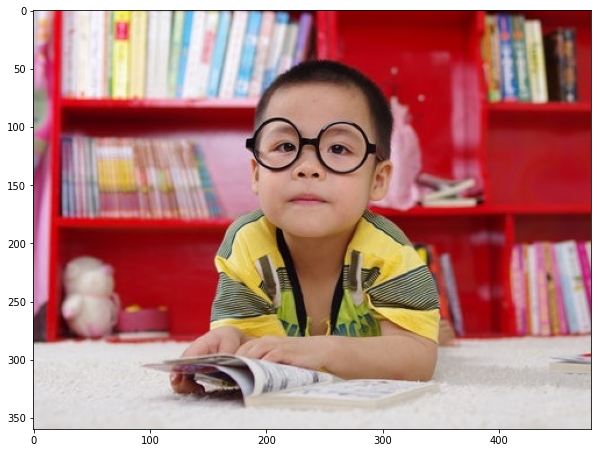

In [11]:
# Display the original image
plt.imshow(image[:,:,::-1])
plt.show()

The pixel coordinates for different areas can be obtained using the x and y axes.

# <font style="color:rgb(50,120,229)">Draw a Line</font>

Let's start off by drawing a line on an image. We will use **`cv2.line`** function for this.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```
line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
```

The arguments that we will focus on are:

1. `img`: Image on which we will draw a line
2. `pt1`: First point(x,y location) of the line segment
3. `pt2`: Second point of the line segment
4. `color`: Color of the line which will be drawn

The above arguments are compulsory. Other arguments that are important for us to know and are optional are:

1. `thickness`: Integer specifying the line thickness. Default value is **1**.
2. `lineType`: Type of the line. Default value is __8__ which stands for an 8-connected line. Usually, **`cv2.LINE_AA`** (**antialiased or smooth line**) is used for the `lineType`.

Let's see an example of this.

### <font style="color:rgb(8,133,37)">Draw a line on his forehead with green color</font>
From the sample image shown above, we can find that the forehead lies between a y coordinate of 50 to 100 and x coordinate of 200 to 300. Let us take this info and draw a line on his forehead.

In [12]:
# Draw a line
imageLine = image.copy()

# The line starts from (200,80) and ends at (280,80)
# The color of the line is RED (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

# We are using semicolon ';' to supress the output
# of the following statement

cv2.line(imageLine, (200, 80), (280, 80), (0, 255, 0), thickness=3, lineType=cv2.LINE_AA);

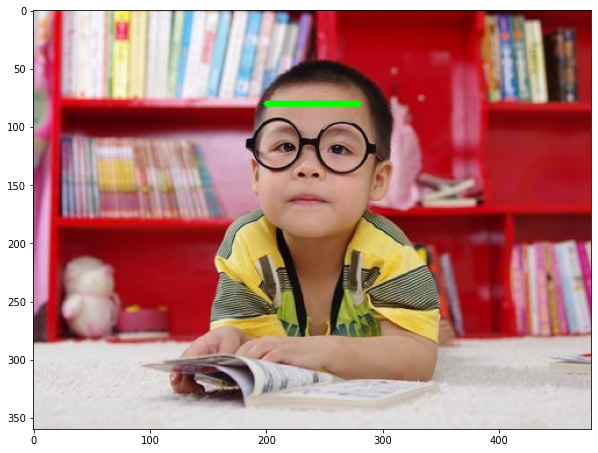

In [14]:
# Display the image
plt.imshow(imageLine[:,:,::-1])
plt.show()

In [142]:
n_lines = 6
length = 50

sp_x = np.array([50]*n_lines, dtype=int)
sp_y = np.linspace(50, 300, n_lines, dtype=int)
ep_x = np.linspace(50+length, 300+length, n_lines, dtype=int)
ep_y = np.linspace(50, 300, n_lines, dtype=int)

t = np.linspace(1, 6, 6, dtype=int)
# thickness = 1 -> 1 Pixel
# thickness = 2 -> 3 Pixels
# thickness = 3 -> 5 Pixels

print(sp_x)
print(sp_y)
print(ep_x)
print(ep_y)
print(t)

[50 50 50 50 50 50]
[ 50 100 150 200 250 300]
[100 150 200 250 300 350]
[ 50 100 150 200 250 300]
[1 2 3 4 5 6]


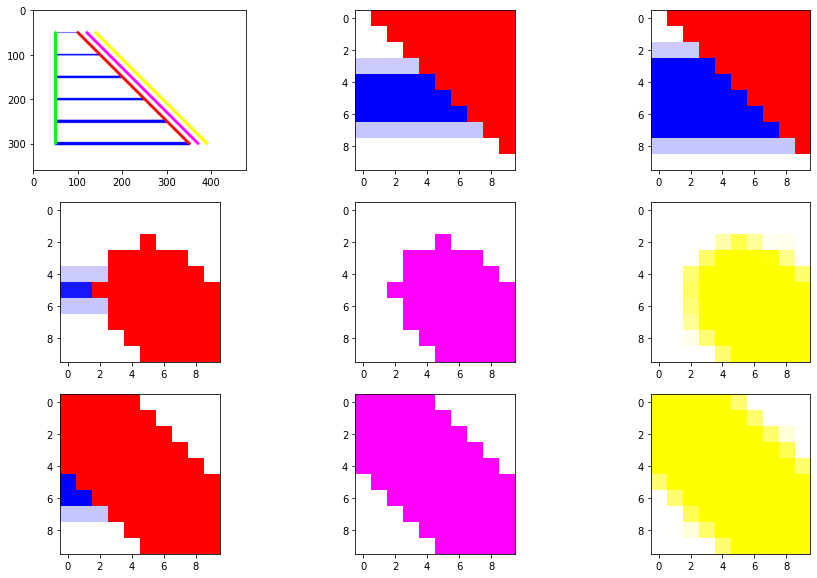

In [141]:
custom_img = np.uint8(np.ones(image.shape)*255)

for i in range(n_lines):
    cv2.line(custom_img, (sp_x[i], sp_y[i]), (ep_x[i], ep_y[i]), (255, 0, 0), thickness=t[i], lineType=cv2.LINE_AA);
    
for i in range(n_lines-1):
    cv2.line(custom_img, (sp_x[i], sp_y[i]), (sp_x[i+1], sp_y[i+1]), (0, 255, 0), thickness=5, lineType=cv2.LINE_4);

for i in range(n_lines-1):
    cv2.line(custom_img, (ep_x[i], ep_y[i]), (ep_x[i+1], ep_y[i+1]), (0, 0, 255), thickness=5, lineType=cv2.LINE_8);
    
for i in range(n_lines-1):
    cv2.line(custom_img, (ep_x[i]+20, ep_y[i]), (ep_x[i+1]+20, ep_y[i+1]), (255, 0, 255), thickness=5, lineType=cv2.LINE_4);
    
for i in range(n_lines-1):
    cv2.line(custom_img, (ep_x[i]+40, ep_y[i]), (ep_x[i+1]+40, ep_y[i+1]), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA);


plt.figure(figsize=[15,10])
plt.subplot(331);plt.imshow(custom_img[:,:,::-1])
plt.subplot(332);plt.imshow(custom_img[95:105,140:150,::-1])
plt.subplot(333);plt.imshow(custom_img[145:155,190:200,::-1])

plt.subplot(334);plt.imshow(custom_img[45:55, 95:105,::-1])
plt.subplot(335);plt.imshow(custom_img[45:55, 115:125,::-1])
plt.subplot(336);plt.imshow(custom_img[45:55, 135:145,::-1])

plt.subplot(337);plt.imshow(custom_img[95:105, 145:155,::-1])
plt.subplot(338);plt.imshow(custom_img[95:105, 165:175,::-1])
plt.subplot(339);plt.imshow(custom_img[95:105, 185:195,::-1])
# plt.imshow(custom_img[:,:,::-1])
plt.show()

# <font style="color:rgb(50,120,229)">Draw a Circle</font>

Now let's have a look at the the **`cv2.circle`** function which can be used to draw a circle on an image.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```
circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
```

First, the mandatory arguments:

1. `img`: Image where the circle is drawn.
2. `center`: Center of the circle.
3. `radius`: Radius of the circle.
4. `color`: Circle color

Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a **filled** circle.
2. `lineType`: Type of the circle boundary. This is exact same as `lineType` argument in `cv2.line`

### <font style="color:rgb(8,133,37)">Draw a circle with center as his nose and radius such that the circle approximately covers his face</font>
We will specify center as (250,125) and radius of 100

In [143]:
# Draw a circle
imageCircle = image.copy()
cv2.circle(imageCircle, (250, 125), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

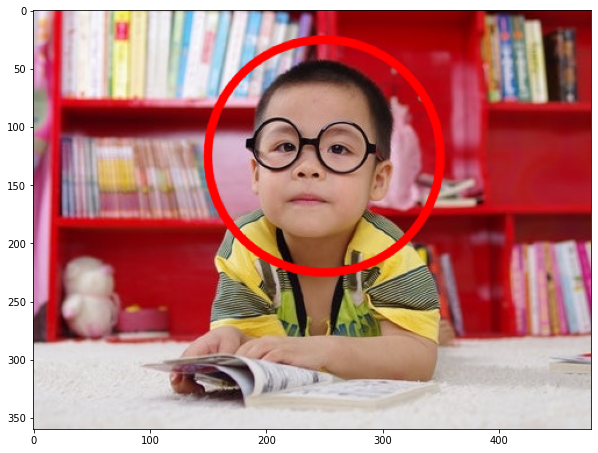

In [145]:
# Display the image
plt.imshow(imageCircle[:,:,::-1])
plt.show()

### <font style="color:rgb(8,133,37)">Draw a filled circle</font>
For a filled circle, we need to pass the thickness argument as -1

In [146]:
# Draw a filled circle
imageFilledCircle = image.copy()
cv2.circle(imageFilledCircle, (250, 125), 100, (0, 0, 255), thickness=-1, lineType=cv2.LINE_AA);

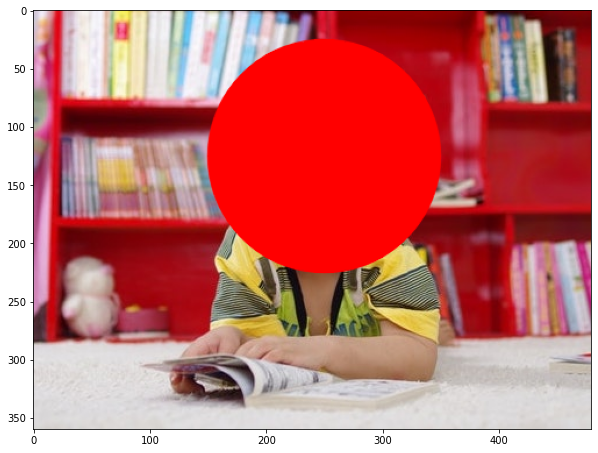

In [148]:
# Display the image
plt.imshow(imageFilledCircle[:,:,::-1])
plt.show()

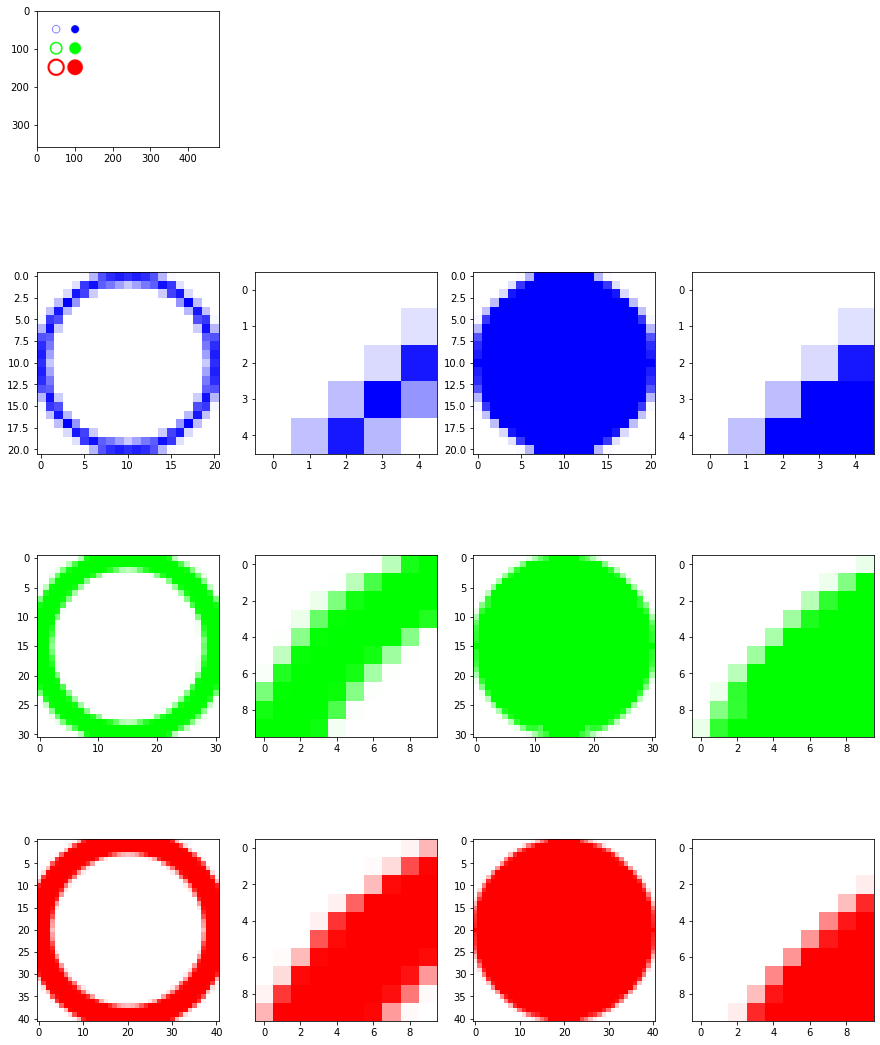

In [200]:
custom_img = np.uint8(np.ones(image.shape)*255)

# circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img

cv2.circle(custom_img, center=(50, 50), radius=10, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(50, 100), radius=15, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(50, 150), radius=20, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

cv2.circle(custom_img, center=(100, 50), radius=10, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(100, 100), radius=15, color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(100, 150), radius=20, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)

plt.figure(figsize=[15,20])
plt.subplot(4,4,1);plt.imshow(custom_img[:,:,::-1])

plt.subplot(4,4,5);plt.imshow(custom_img[40:61, 40:61,::-1])
plt.subplot(4,4,6);plt.imshow(custom_img[40:45, 40:45,::-1])
plt.subplot(4,4,7);plt.imshow(custom_img[40:61, 90:111,::-1])
plt.subplot(4,4,8);plt.imshow(custom_img[40:45, 90:95,::-1])

plt.subplot(4,4, 9);plt.imshow(custom_img[85:116,35:66,::-1])
plt.subplot(4,4,10);plt.imshow(custom_img[85:95,35:45,::-1])
plt.subplot(4,4,11);plt.imshow(custom_img[85:116,85:116,::-1])
plt.subplot(4,4,12);plt.imshow(custom_img[85:95,85:95,::-1])

plt.subplot(4,4,13);plt.imshow(custom_img[130:171,30:71,::-1])
plt.subplot(4,4,14);plt.imshow(custom_img[130:140,30:40,::-1])
plt.subplot(4,4,15);plt.imshow(custom_img[130:171,80:121,::-1])
plt.subplot(4,4,16);plt.imshow(custom_img[130:140,80:90,::-1])

plt.show()

# <font style="color:rgb(50,120,229)">Draw an Ellipse</font>

Now it's the turn to draw an ellipse using **`cv2.ellipse`** function.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```
ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img
```

The mandatory arguments are as follows.

1. `img`: Image on which the ellipse is to be drawn.
2. `center`: Center of the ellipse.
3. `axes`: radius of the ellipse major and minor axes.
4. `angle`: Ellipse rotation angle in degrees.
5. `startAngle`: Starting angle of the elliptic arc in degrees.
6. `endAngle`: Ending angle of the elliptic arc in degrees.
7. `color`: Ellipse line color

The optional arguments that we are going to use are the same as before and carry the same meaning.


### <font style="color:rgb(8,133,37)">Draw 2 ellipses around his face</font>
We will draw the first ellipse at an angle of 0 degrees with blue color.
The second ellipse will be at 90 degrees with red color

Both ellipses will be complete i.e. the starting angle is 0 and ending angle is 360

In [201]:
# Draw an ellipse
# Note: Ellipse Centers and Axis lengths must be integers
imageEllipse = image.copy()
cv2.ellipse(imageEllipse, (250, 125), (100, 50), 0, 0, 360, (255, 0, 0), thickness=3, lineType=cv2.LINE_AA);
cv2.ellipse(imageEllipse, (250, 125), (100, 50), 90, 0, 360, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA);

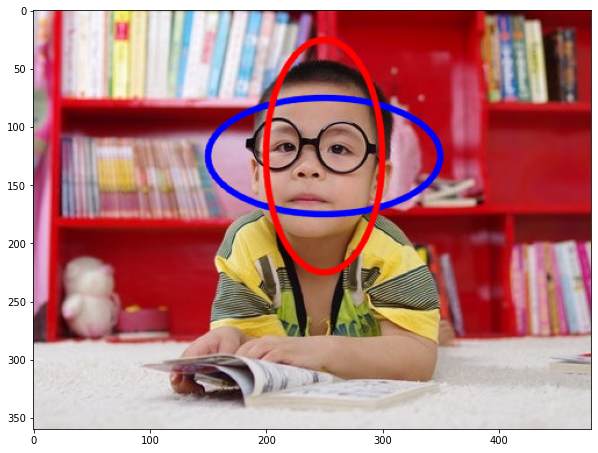

In [202]:
# Display the image
plt.imshow(imageEllipse[:,:,::-1])

### <font style="color:rgb(8,133,37)">Draw more variations of the ellipse</font>)
We will draw half ellipses ( i.e. starting angle and ending angles are not 0 to 360 degrees).

Let's draw a ellipse with 
* starting angle = 180 and ending angle = 360
* starting angle = 0 and ending angle = 180

In [14]:
# Draw an ellipse
# Note: Ellipse Centers and Axis lengths must be integers
imageEllipse = image.copy()
# Incomplete/Open ellipse
cv2.ellipse(imageEllipse, (250, 125), (100, 50), 0, 180, 360, (255, 0, 0), thickness=3, lineType=cv2.LINE_AA);
# Filled ellipse
cv2.ellipse(imageEllipse, (250, 125), (100, 50), 0, 0, 180, (0, 0, 255), thickness=-2, lineType=cv2.LINE_AA);

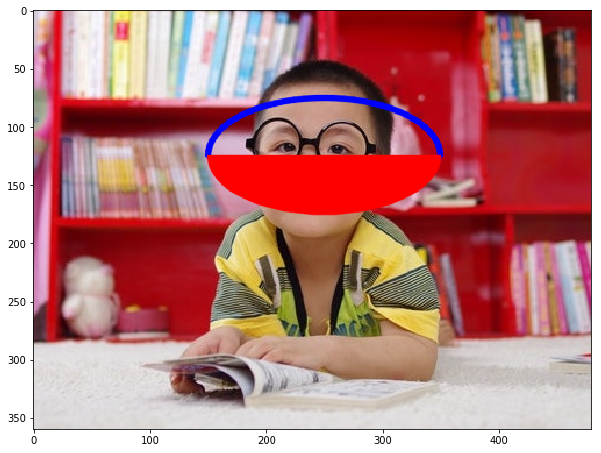

In [15]:
# Display the image
plt.imshow(imageEllipse[:,:,::-1])

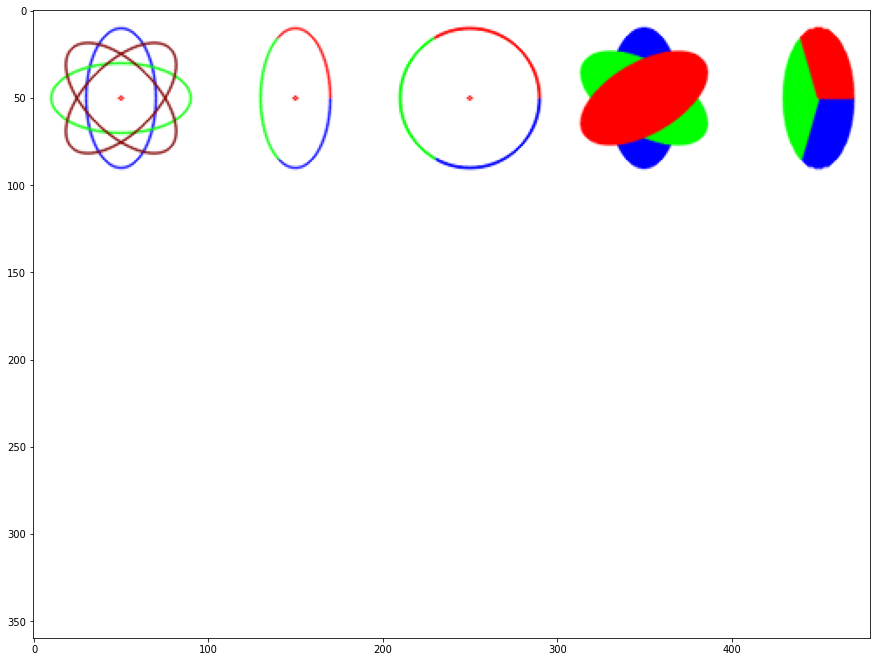

In [230]:
custom_img = np.uint8(np.ones(image.shape)*255)

# ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img

cv2.circle(custom_img, center=(50, 50), radius=1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(150, 50), radius=1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(250, 50), radius=1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.circle(custom_img, center=(350, 50), radius=1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)


cv2.ellipse(custom_img, center=(50, 50), axes=(20, 40), angle=0, startAngle=0, endAngle=360, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(50, 50), axes=(20, 40), angle=90, startAngle=0, endAngle=360, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(50, 50), axes=(20, 40), angle=45, startAngle=0, endAngle=360, color=(127, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(50, 50), axes=(20, 40), angle=315, startAngle=0, endAngle=360, color=(127, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.ellipse(custom_img, center=(150, 50), axes=(20, 40), angle=0, startAngle=0, endAngle=119, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(150, 50), axes=(20, 40), angle=0, startAngle=120, endAngle=239, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(150, 50), axes=(20, 40), angle=0, startAngle=240, endAngle=360, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=0, endAngle=119, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=120, endAngle=239, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=240, endAngle=360, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.ellipse(custom_img, center=(350, 50), axes=(20, 40), angle=0, startAngle=0, endAngle=360, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(350, 50), axes=(20, 40), angle=120, startAngle=0, endAngle=360, color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(350, 50), axes=(20, 40), angle=240, startAngle=0, endAngle=360, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=0, endAngle=119, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=120, endAngle=239, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(250, 50), axes=(40, 40), angle=0, startAngle=240, endAngle=360, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.ellipse(custom_img, center=(450, 50), axes=(20, 40), angle=0, startAngle=0, endAngle=119, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(450, 50), axes=(20, 40), angle=0, startAngle=120, endAngle=239, color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)
cv2.ellipse(custom_img, center=(450, 50), axes=(20, 40), angle=0, startAngle=240, endAngle=360, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)


plt.figure(figsize=[15,20])

plt.imshow(custom_img)


plt.show()

# <font style="color:rgb(50,120,229)">Draw a Rectangle</font>

We will use **`cv2.rectangle`** function to draw a rectangle on an image. The function syntax is as follows.

### <font style="color:rgb(8,133,37)">Function Syntax</font>
```
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
```
The mandatory arguments are as follows.
1. `img`: Image on which the rectangle is to be drawn.
2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.
3. `pt2`: Vertex of the rectangle opposite to `pt1`. Usually we use the **bottom-right vertex** here.
4. `color`: Rectangle color

The optional arguments that we are going to use are same as before.

### <font style="color:rgb(8,133,37)">Draw a rectangle around his face</font>
We need two points to draw a rectangle. These are the opposite vertices of the rectangle. From the sample image, we can approximately find the vertices as
* top-left - (170,50)
* bottom-right - (300,200)

In [231]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()
cv2.rectangle(imageRectangle, (170, 50), (300, 200), (255, 0, 255), thickness=5, lineType=cv2.LINE_8);

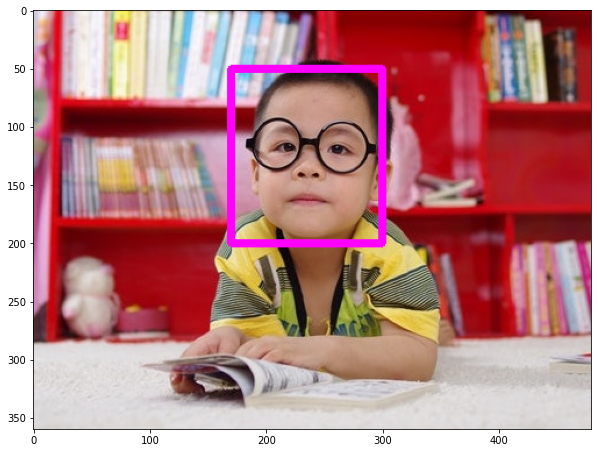

In [232]:
# Display the image
plt.imshow(imageRectangle[:,:,::-1])
plt.show()

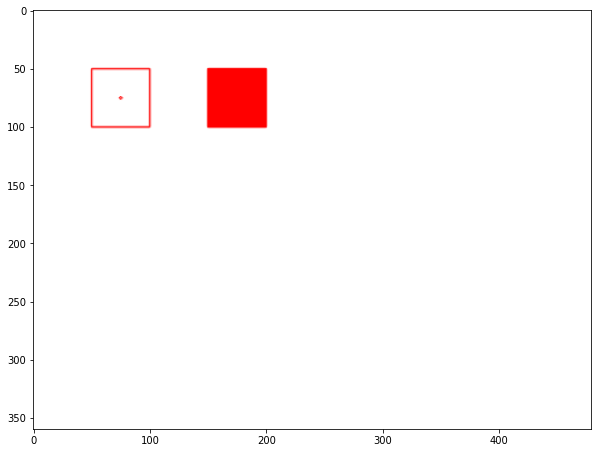

In [240]:
custom_img = np.uint8(np.ones(image.shape)*255)

# rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img

cv2.circle(custom_img, center=(75, 75), radius=1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.rectangle(custom_img, pt1=(50, 50), pt2=(100, 100), color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.rectangle(custom_img, pt1=(150, 50), pt2=(200, 100), color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

plt.imshow(custom_img)
plt.show()

# <font style="color:rgb(50,120,229)">Add Text</font>

Finally, let's see how we can write some text on an image using **`cv2.putText`** function.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
```

The mandatory arguments that we need to focus on are:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: **Bottom-left corner of the text string in the image**.
4. `fontFace`: Font type - https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color


The optional arguments that we are going to use are same as before.

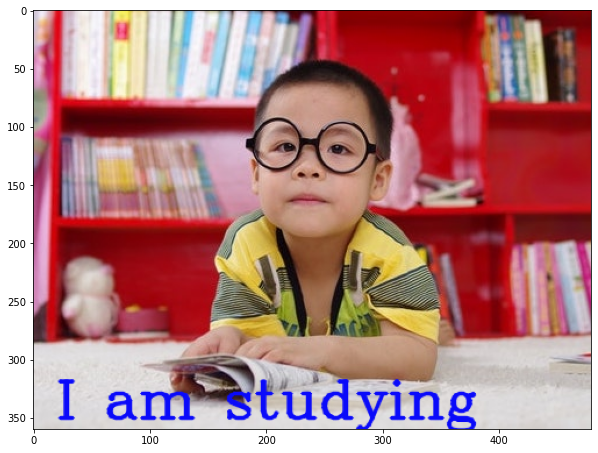

In [247]:
# Put text into image

imageText = image.copy()
text = "I am studying"
fontScale = 1.5
fontFace = cv2.FONT_HERSHEY_COMPLEX
fontColor = (250, 10, 10)
fontThickness = 2

cv2.putText(imageText, text, (20, 350), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:,:,::-1])
plt.show()

# <font style="color:rgb(50,120,229)">Issues in Text annotation</font>
There are a few issues with annotating with text.

- First, the text looks pretty big. This happens very often because it is difficult to say before-hand what size text you should use. If the image is very large, fontScale=1.5 can look too small and vice-versa.
- Second, You can see the bottom part of the text is slightly clipped. This happens because we dont know how big the text will look on the image.


There are ways to get the fontScale that we should use, which depend on the image itself and how much area of the image we want to use for the text. Let us have a look at them.

# <font style="color:rgb(50,120,229)">Solution 1: Get font size from pixel height of text</font>
We had used a fontScale of 1.5 in the previous example. Suppose we want to use a text which has a height of 20 pixels only, what should be the fontScale? There is an OpenCV function getFontScaleFromHeight which calculates the fontScale given the height and font.

### <font style="color:rgb(8,133,37)">Function Syntax</font>
```
fontScale   =   cv2.getFontScaleFromHeight( fontFace, pixelHeight[, thickness]  )
```
**Parameters**

- `fontFace` - Font to use
- `pixelHeight` - Pixel height to compute the fontScale for
- `thickness` - Thickness of lines used to render the text. See putText for details
- `fontScale` (Output) - The fontsize to use in **cv2.putText()** function.


Example
Instead of using a fontScale, let us use a text height of 20 pixels to determine the fontScale and and write the same text again.

0.8809523809523809


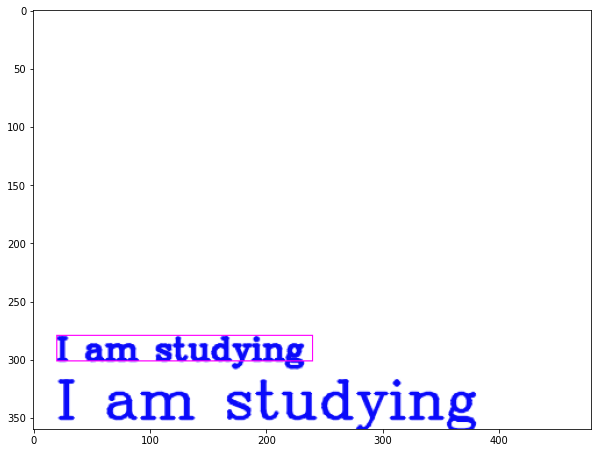

In [277]:
custom_img = np.uint8(np.ones(image.shape)*255)

text = "I am studying"
fontScale = 1.5
fontFace = cv2.FONT_HERSHEY_COMPLEX
fontColor = (250, 10, 10)
fontThickness = 2
pixelHeight = 20

fontScaleF = cv2.getFontScaleFromHeight(fontFace, pixelHeight=pixelHeight, thickness=fontThickness); print(fontScaleF)

cv2.putText(custom_img, text, (20, 350), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);  # Not scaled
cv2.putText(custom_img, text, (20, 300), fontFace, fontScaleF, fontColor, fontThickness, cv2.LINE_AA); # Scaled
cv2.rectangle(custom_img, (20, 279), (240, 301), color=(255,0,255), thickness=1)

# Display the image
plt.imshow(custom_img[:,:,::-1])
plt.show()

0.8809523809523809
2.0555555555555554
0.8809523809523809
0.8809523809523809
0.8809523809523809
1.4230769230769231
0.8809523809523809
0.8809523809523809
0.8809523809523809


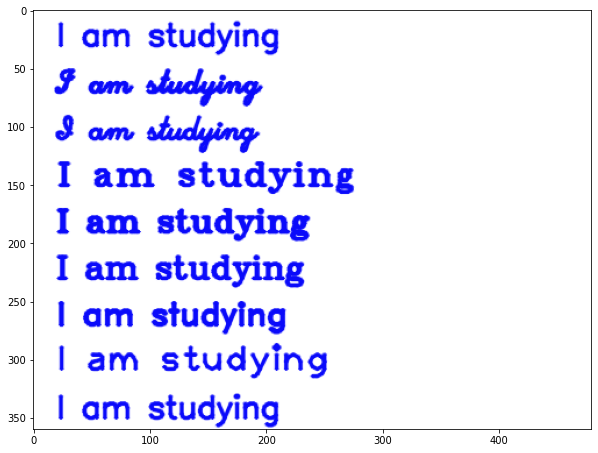

In [291]:
custom_img = np.uint8(np.ones(image.shape)*255)

fonts = [    
        cv2.FONT_HERSHEY_SIMPLEX,
        cv2.FONT_HERSHEY_PLAIN,
        cv2.FONT_HERSHEY_DUPLEX,
        cv2.FONT_HERSHEY_COMPLEX,
        cv2.FONT_HERSHEY_TRIPLEX,
        cv2.FONT_HERSHEY_COMPLEX_SMALL,
        cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
        cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
        cv2.FONT_ITALIC
        ]

start_x = np.linspace(350, 30, 9, dtype=int)

text = "I am studying"
fontColor = (250, 10, 10)
fontThickness = 2
pixelHeight = 20

for fontFace, start in zip(fonts, start_x):
    fontScale = cv2.getFontScaleFromHeight(fontFace, pixelHeight=pixelHeight, thickness=fontThickness)
    print(fontScale)
    cv2.putText(custom_img, text, (20, start), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA)
    

# Display the image
plt.imshow(custom_img[:,:,::-1])
plt.show()

# <font style="color:rgb(50,120,229)">Solution 2: Get height and width of text</font>
In the previous example, we printed the text at the bottom left corner. What if we want to center the text? Without knowing how much area the text is going to take, it is not possible to do that. Not only centering, it can be used in other scenarios also. For example, it is difficult to write text when the background is "busy". In those cases, we can create a rectangular canvas and write the text on top of that.

There is an OpenCV function getTextSize which determines the height and width of the text box. Let's see with an example to make it clear.

### <font style="color:rgb(8,133,37)">Function Syntax</font>
```
textSize, baseLine  =   cv2.getTextSize(    text, fontFace, fontScale, thickness    )
```
**Parameters**

- `text` - Input text string.
- `fontFace` - Font to use, see HersheyFonts.
- `fontScale` - Font scale factor that is multiplied by the font-specific base size.
- `thickness` - Thickness of lines used to render the text. See putText for details.
- `baseLine` (Output) - y-coordinate of the baseline relative to the bottom-most text point. In our example, this value will be the difference in height of the bottom-most tip of y and i
- `textSize` (Output) - The text size (width, height)


Example 
We will take the fontScale from the previous example and create a white canvas to write the text at the bottom center of the image.

Output ((365, 32), 14)
textSize (365, 32)
baseLine 14
TextWidth = 365, TextHeight = 32, baseLine = 14
TextBox Bottom Left = (57,42)
Canvas Bottom Left = (57, 56), Top Right = (422, 10)


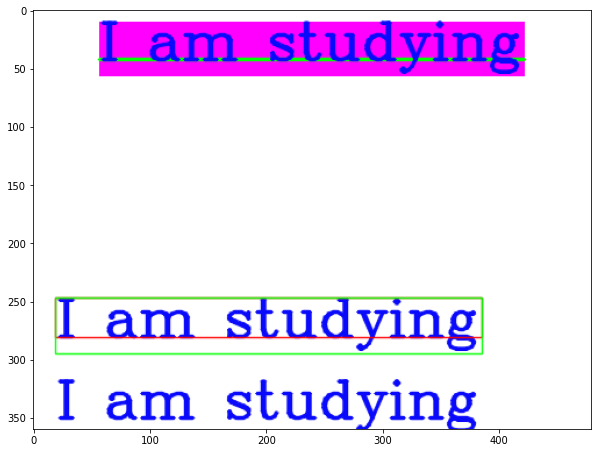

In [332]:
custom_img = np.uint8(np.ones(image.shape)*255)

imageHeight, imageWidth = custom_img.shape[:2]

fontFace = cv2.FONT_HERSHEY_COMPLEX

text = "I am studying"
fontColor = (250, 10, 10)
fontThickness = 2
fontScale = 1.5
lineThickness = 2

# Get the text box height and width and also the baseLine
textSize, baseLine = cv2.getTextSize(text, fontFace, fontScale, fontThickness)
print('Output', cv2.getTextSize(text, fontFace, fontScale, fontThickness))
print('textSize', textSize)
print('baseLine', baseLine)

textWidth, textHeight = textSize
print("TextWidth = {}, TextHeight = {}, baseLine = {}".format(textWidth, textHeight, baseLine))

# Get the coordinates of text box bottom left corner
# The xccordinate will be such that the text is centered
xcoordinate = (imageWidth - textWidth)//2
# The y coordinate will be such that the entire box is just 10 pixels below the bottom of image
ycoordinate = (textHeight + 10)
print("TextBox Bottom Left = ({},{})".format(xcoordinate, ycoordinate))

# # Draw the Canvas using a filled rectangle
canvasColor = (255, 0, 255)
canvasBottomLeft = (xcoordinate, ycoordinate + baseLine)
canvasTopRight = (xcoordinate+textWidth, ycoordinate-textHeight)
cv2.rectangle(custom_img, canvasBottomLeft, canvasTopRight, canvasColor, thickness=-1);
print("Canvas Bottom Left = {}, Top Right = {}".format(canvasBottomLeft,canvasTopRight))


# TOP TEXT WITH MAGENTA BACKGROUND
# Now draw the baseline ( just for reference )
lineThickness = 2
lineLeft = (xcoordinate, ycoordinate)
lineRight = (xcoordinate+textWidth, ycoordinate)
lineColor = (0, 255, 0)
cv2.line(custom_img, lineLeft, lineRight, lineColor, thickness=lineThickness, lineType=cv2.LINE_AA);

# Finally Draw the text
cv2.putText(custom_img, text, (xcoordinate, ycoordinate), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);


# ORIGINAL
cv2.putText(custom_img, text, (20, 350), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);  # Not scaled

# SECOND - red box (not seen behin the green) - green box
cv2.putText(custom_img, text, (20, 280), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);
cv2.rectangle(custom_img, (20-1, 280-textHeight-1), (20+textWidth+1, 280+1), color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
cv2.rectangle(custom_img, (20-1, 280-textHeight-1), (20+textWidth+1, 280+baseLine+1), color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

# Display the Output Image
plt.imshow(custom_img[...,::-1])
plt.show()

# <font style="color:rgb(50,120,229)">Further Reading</font>
There are a few more functions that you can go through which can be used along with `cv2.putText` function.

[getTextSize](https://docs.opencv.org/4.1.0/d6/d6e/group__imgproc__draw.html#ga3d2abfcb995fd2db908c8288199dba82)

[getFontScaleFromHeight](https://docs.opencv.org/4.1.0/d6/d6e/group__imgproc__draw.html#ga442ff925c1a957794a1309e0ed3ba2c3)